#Image Features and Homographies

In [188]:
# import libraries
import numpy as np
import math
import matplotlib.pyplot as plt

Various functions for Homework 3

In [189]:
# Find all normal lines from point pairs
def points2lines(points):
    lines = np.zeros([1,3])
    r,c = points.shape
    while(r>1):
        for i in np.arange(1,r):
            line = np.cross(points[i,:], points[0,:])
            lines = np.vstack([lines, line])
        points = points[1:,:]
        r,c = points.shape
    lines = lines[1:,:]
    return lines


# Convert linear eqn to rho-theta
def linear2hough(lines):
    rhotheta = np.zeros([lines.shape[0],2])
    for i in range(lines.shape[0]):
        slope = -lines[i,0]/lines[i,1]
        theta = math.atan(-1/slope)
        if theta !=(0):
            b = -lines[i,2]/lines[i,1]
            x = -b/(slope+1/slope)
            y = slope*x + b
            rho = x*np.cos(theta) + y*np.sin(theta)
        else:
            rho = -lines[i,2]/lines[i,0]
        rhotheta[i,:] = [rho, theta]
    return rhotheta


# Plot a list of vertices as lines
def verts2lines(vertices):
    for i in range(vertices.shape[0]):
        if i == vertices.shape[0]-1:
            x = [vertices[i,0], vertices[0,0]]
            y = [vertices[i,1], vertices[0,1]]      
        else:
            x = [vertices[i,0], vertices[i+1,0]]
            y = [vertices[i,1], vertices[i+1,1]]
        plt.plot(x,y)
    return


# Convert Hough to linear equation
def hough2linear(rhotheta):
    lines = np.zeros([rhotheta.shape[0],3])
    for i in range(lines.shape[0]):
        rho = rhotheta[i,0]
        theta = rhotheta[i,1]*np.pi/180
        # Theta needs to be +/-90deg
        if theta > np.pi/2:
            theta = theta-np.pi
        if theta < -np.pi/2:
            theta = theta+np.pi

        x = rho*np.cos(theta)
        y = rho*np.sin(theta)
        slope = -1/np.tan(theta)
        intercept = y-slope*x
        if theta==0:
            line = [1,0,-x]
        elif theta==np.pi/2 or theta==-np.pi/2:
            line = [0,-1/intercept,1]
        else:
            line = [slope/intercept,-1/intercept,1]
        lines[i,:] = line
        
    return lines


# Find line intersections
def intersect(lines):
    corners = np.zeros([lines.shape[0],3])
    for i in np.arange(lines.shape[0]):
        if i == lines.shape[0]-1:

            corner = np.cross(lines[i,:],lines[0,:])       
        else:
            corner = np.cross(lines[i,:],lines[i+1,:])
        corners[i,:] = corner/corner[2]
    return corners


# Rotate points around the z-axis
def rotz(theta):
    Tz = np.array([[np.cos(theta), -np.sin(theta), 0],
                   [np.sin(theta),  np.cos(theta), 0],
                   [            0,              0, 1]])
    return Tz

#Problem #1
Find the Hough transform (using the normal equation of a line) for the lines enclosing an object
with vertices A=(2,0), B=(2,2) and C=(0,2). Sketch the modified object enclosed by lines replacing
(rho,theta) of the given object lines with (rho*rho,theta + 90). Calculate the area of the modified
object.

Rho and Theta(rad):
[[2.   0.  ]
 [1.41 0.79]
 [2.   1.57]]


/tmp/ipykernel_45976/977661485.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -lines[i,0]/lines[i,1]
/tmp/ipykernel_45976/977661485.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  theta = math.atan(-1/slope)
/tmp/ipykernel_45976/977661485.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  x = -b/(slope+1/slope)


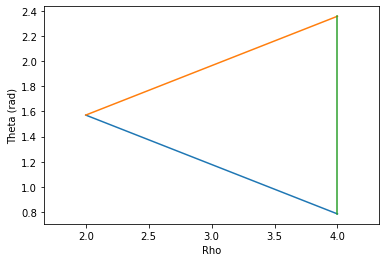

In [190]:
A = [2,0]
B = [2,2]
C = [0,2]
points = np.vstack([A,B,C])
r,c = points.shape
points = np.hstack([points, np.ones([r,1])])

lines = points2lines(points)
rhotheta = linear2hough(lines)
print('Rho and Theta(rad):')
print(np.around(rhotheta,2))
angle = rhotheta[:,1]*180/np.pi

# Modified Object
rhotheta[:,0] = rhotheta[:,0]**2
rhotheta[:,1] = rhotheta[:,1]+np.pi/4
verts2lines(rhotheta)
plt.axis('equal')
plt.xlabel('Rho')
plt.ylabel('Theta (rad)')
plt.show()

#Problem #2
(a) Draw the polygon in image space and indicate the coordinates of the four vertices.
(b) The polygon is rotated 30 degrees counterclockwise around the image space origin. Find the
Hough transform for the sides of the rotated polygon.

/tmp/ipykernel_45976/977661485.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  slope = -1/np.tan(theta)


[[3.   3.   1.  ]
 [3.   0.27 1.  ]
 [0.63 1.63 1.  ]
 [2.   3.   1.  ]]


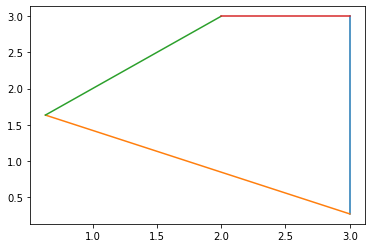

In [191]:
AB = [3,90]
BC = [3,0]
CD = [np.sqrt(3),60]
DA = [-np.sqrt(2)/2,-45]
sides = np.vstack([AB,BC,CD,DA])

# Convert Hough transform to linera equation
normlines = hough2linear(sides)

# Find the line intersections
corners = intersect(normlines)
print(np.around(corners,2))

# Plot the vertices and
verts2lines(corners)

Rotate image by 30 degrees ccw around the image space origin

[[3.         3.         1.        ]
 [3.         0.26794919 1.        ]
 [0.6339746  1.6339746  1.        ]
 [2.         3.         1.        ]]


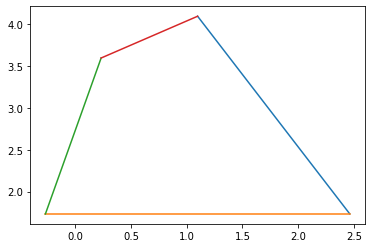

In [192]:
# Rotate 30d CCW about image space origin
angle = 30
theta = np.pi/180 * angle

r,c = corners.shape
CCW30 = np.zeros([r,c])
for i in range(r):
    CCW30[i,:] = np.matmul(rotz(theta),corners[i,:].T).T
print(corners)

verts2lines(CCW30)